In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from functions import *
plt.style.use(plt.style.available[5])

# 5.1. Pyramid



5.1.1. For the “Mona Lisa” image, build a 5 level Gaussian pyramid and display it in a format. Also, implement and 
display a Laplacian (difference of Gaussian (DoG)) pyramid.

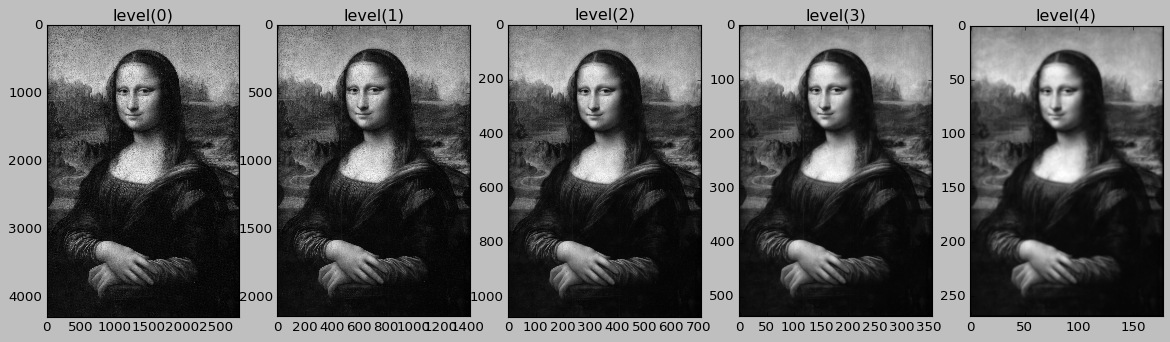

In [12]:
mona = cv2.imread('mona lisa.jpg',cv2.IMREAD_GRAYSCALE)

# gaussian pyramid
gaussian_pyr = gaussian_pyramid(mona,4)

figure = plt.figure(figsize=(18,18))
n = len(gaussian_pyr)

for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(gaussian_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')


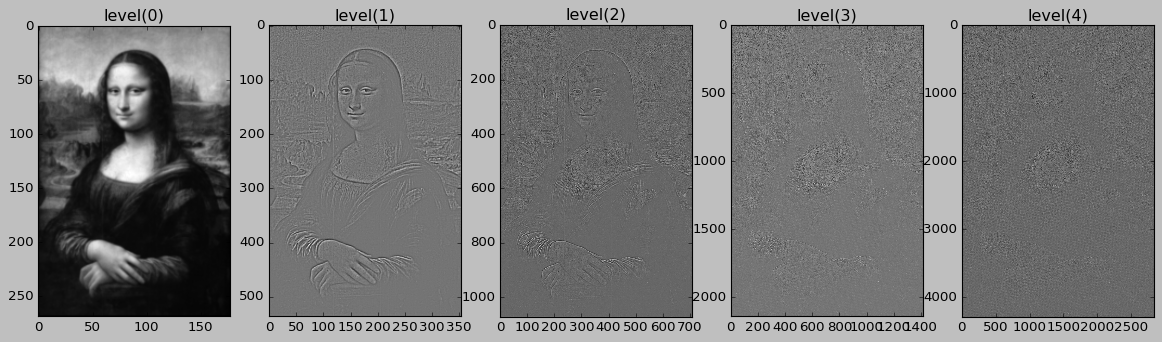

In [13]:
# laplacian pyramid
l_pyramid = laplacian_pyramid(gaussian_pyr)

figure = plt.figure(figsize=(18,18))
n = len(l_pyramid)

for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(l_pyramid[i],cmap='gray')
    plt.title(f"level({i})",color='black')

5.1.2. Describe how separability and cascading can help to speed up Gaussian smoothing and design a fast algorithm
for computing a 3-step gaussian pyramid (filtered with σ, √2σ, 2σ) of a 2D image using pseudo-code.


5.1.3. Given an image of size 𝑁 × 𝑁, where 𝑁 = 2
𝐽
, what is the maximum number of levels you can have in an 
approximation pyramid representation? (The maximum level is reached when the coarsest level has only 1 pixel). 
What is the total number of pixels in the pyramid (i.e. including pixels at all pyramid levels)? How does this 
number compare with the original number of pixels in the image? Since this number is larger than the original 
pixel number, what are some of the benefits of using the approximation pyramid? (give some examples). Repeat 
the step for the prediction residual pyramid. Display and discuss the results.


10


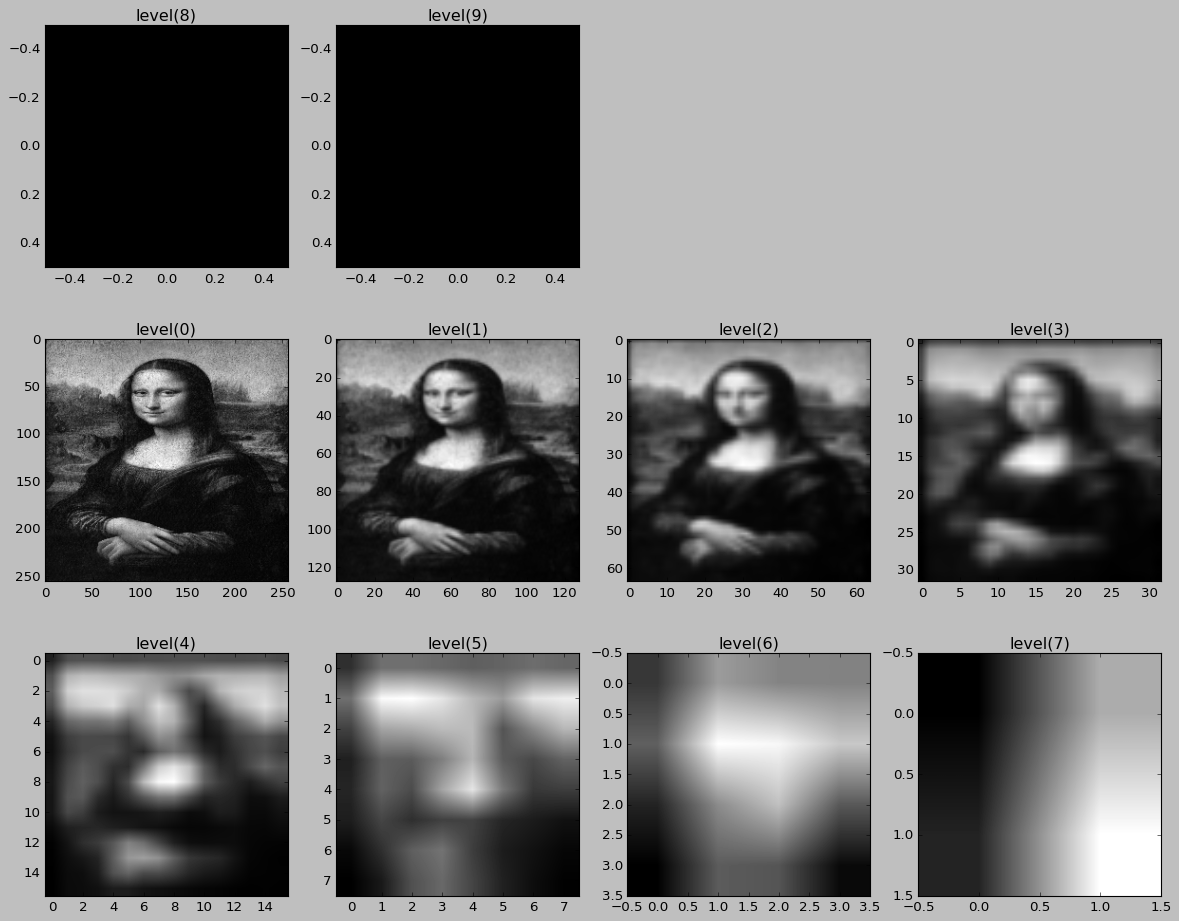

In [14]:
mona = cv2.imread('mona lisa.jpg',cv2.IMREAD_GRAYSCALE)
# resize 'mona lisa' to make it divisible by 2
mona_r = cv2.resize(mona, (256, 256)).copy() 

gaussian_pyr = gaussian_pyramid(mona_r,9)

figure = plt.figure(figsize=(18,18))
n = len(gaussian_pyr)
print(n)
j=1
for i in range(n):
    x = i%8
    if x == 4:
        j +=1
    figure.add_subplot(j,4,x+1)

    plt.imshow(gaussian_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')

MSE: 0.000000
None


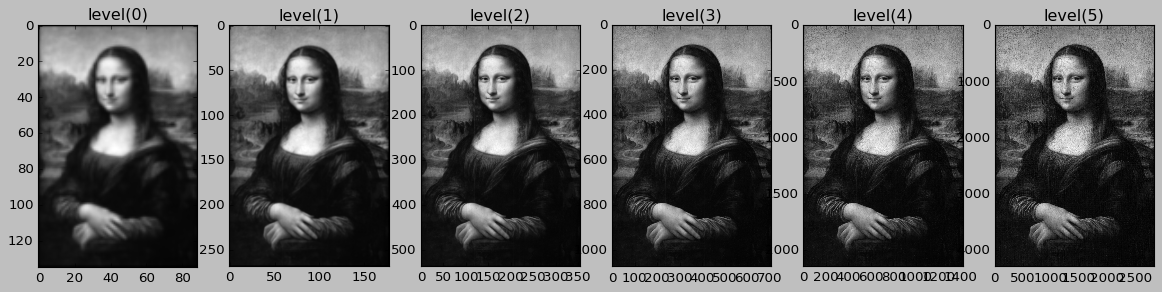

In [15]:
mona = cv2.imread('mona lisa.jpg',cv2.IMREAD_GRAYSCALE)

gaussian_pyr = gaussian_pyramid(mona,5)

laplacian_pyr,reconstruct_pyr = pyramid_reconstruct(gaussian_pyr)
n = len(reconstruct_pyr)

figure = plt.figure(figsize=(18,18))
for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(reconstruct_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')

print(print(f'MSE: {mean_square_error(mona,reconstruct_pyr[-1])}'))

5.1.4. For the grayscale Lena image, manually compute a 3-level approximation pyramid and corresponding prediction 
residual pyramid. Use 2x2 averaging for the approximation and use pixel replication for the interpolation filters.

approximation_pyr


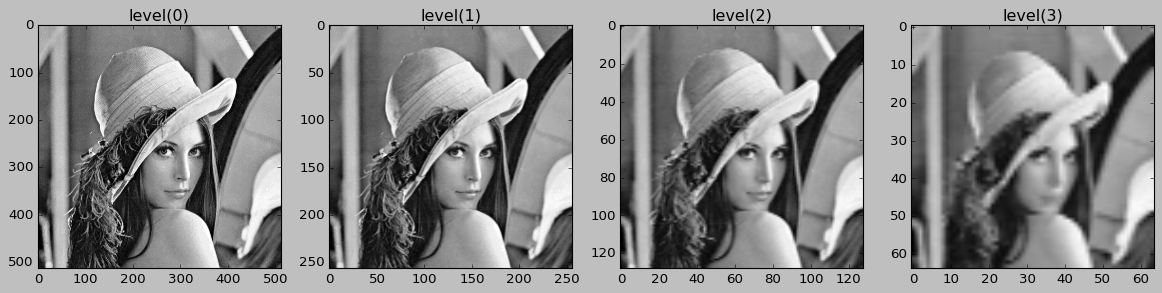

prediction_pyr


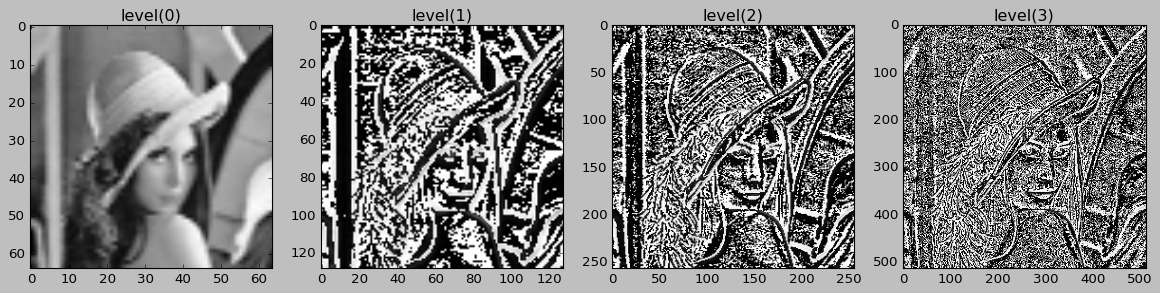

reconstruct_pyr


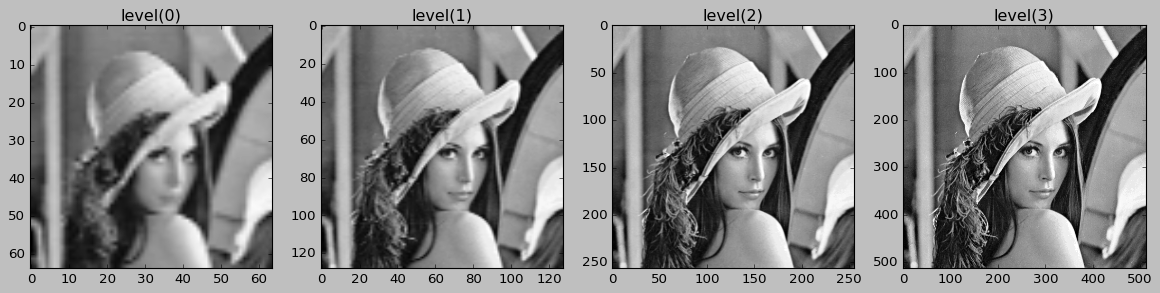

In [16]:
lena = cv2.imread('Lena.bmp',cv2.IMREAD_GRAYSCALE)

# the approxiation_pyramid function uses 2*2 box filter for filtering kernel
approximation_pyr = approximation_pyramid(lena,3)

# the pyramid_reconstruct function,use a approximation pyramid (either with gaussian kernel or box fiter)
# to rebulid the original image.
prediction_pyr , reconstruct_pyr = pyramid_reconstruct(approximation_pyr)
n=len(approximation_pyr)

print("approximation_pyr")
figure = plt.figure(figsize=(18,18))
for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(approximation_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
plt.show()

print('prediction_pyr')
figure2 = plt.figure(figsize=(18,18))
for i in range(n):
    figure2.add_subplot(1,n,i+1)
    plt.imshow(prediction_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
plt.show()

print('reconstruct_pyr')
figure3 = plt.figure(figsize=(18,18))
for i in range(n):
    figure3.add_subplot(1,n,i+1)
    plt.imshow(reconstruct_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
plt.show()


5.1.5. For the grayscale Lena Image, compute the wavelet transform (with 3-level) using the Haar analysis filters.
Comment on the differences between the pyramids generated in Prob. 5.1.2 with the ones generated here. 

Wavelet MSE: 0.000084
Wavelet PSNR: 88.89197601997365
Manual MSE: 0.000000
Manual PSNR: inf


c:\Users\siedt\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)


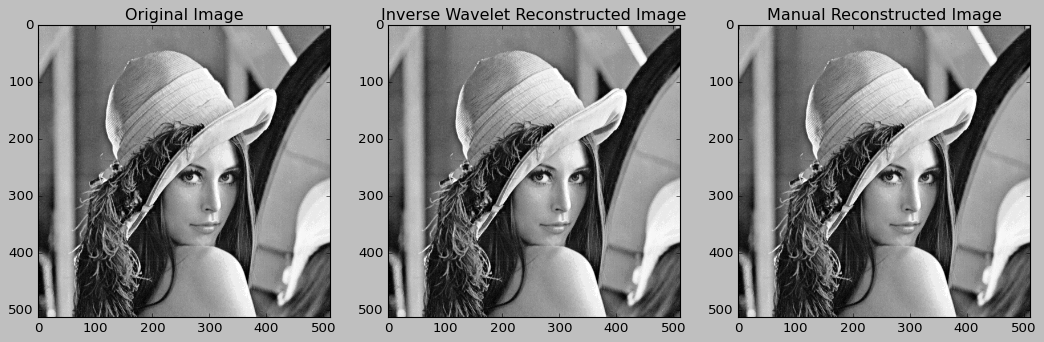

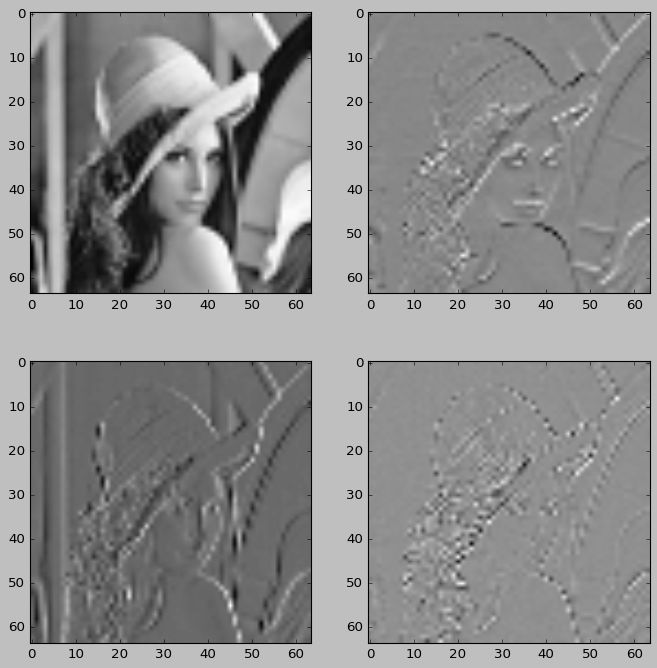

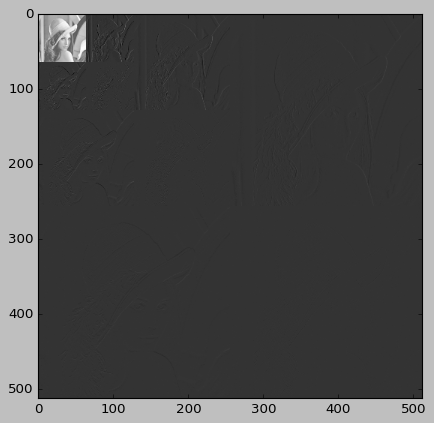

In [17]:
import pywt

lena = cv2.imread('Lena.bmp',cv2.IMREAD_GRAYSCALE)
level = 3

# wavelet transform. The function returns coefficients of transform 
c_matrix ,coefficients = wavelet_payramid(lena,level)

# coefficients of last level
cA = coefficients[0]
(cH,cV,cD) = coefficients[(-1*level)]

# inverse wavelet transform
# using previous coefficients, we rebuild the image
lena_i = pywt.waverec2(coefficients, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

figure = plt.figure(figsize=(16,16))
figure.add_subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('Original Image')

figure.add_subplot(1,3,2)
plt.imshow(lena_i,cmap='gray')
plt.title('Inverse Wavelet Reconstructed Image')

figure.add_subplot(1,3,3)
plt.imshow(reconstruct_pyr[-1],cmap='gray')
plt.title('Manual Reconstructed Image')

print(f'Wavelet MSE: {mean_square_error(lena,lena_i)}')
print(f'Wavelet PSNR: {PSNR(lena,lena_i)}')
print(f'Manual MSE: {mean_square_error(lena,reconstruct_pyr[-1])}')
print(f'Manual PSNR: {PSNR(lena,reconstruct_pyr[-1])}')


figure2 = plt.figure(figsize=(10, 10))
figure2.add_subplot(2, 2, 1)
plt.imshow(cA, cmap='gray')

figure2.add_subplot(2, 2, 2)
plt.imshow(cH, cmap='gray')

figure2.add_subplot(2, 2, 3)
plt.imshow(cV, cmap='gray')

figure2.add_subplot(2, 2, 4)
plt.imshow(cD, cmap='gray')
plt.show()

# the whole wavelet pyramid
plt.imshow(c_matrix,cmap='gray')

5.1.6. Quantize all the wavelet coefficients (whole sub-bands) created in Prob. 5.1.4 by a step size of 𝛾 = 2. Then 
reconstruct the image from the quantized wavelet coefficients using Haar synthesis filter. Report PSNR values 
and discuss the results.
𝑐
′
(𝑢, 𝑣) = 𝛾 × 𝑠𝑔𝑛[𝑐(𝑢, 𝑣)] × 𝑓𝑙𝑜𝑜𝑟 [
|𝑐(𝑢, 𝑣)|
𝛾
] , 𝑐 represents the wavelet coefficient
Note: you can use dwt2, idwt2, and psnr functions for problems 5.


MSE: 1.367565
PSNR: 46.77132334238592


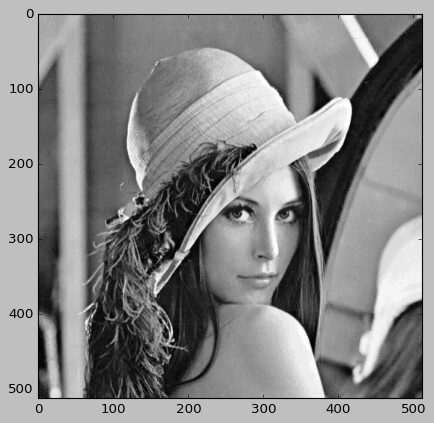

In [18]:
# extract sub-bands coefficients
cA = coefficients[0]
(cH1,cV1,cD1) = coefficients[-1]
(cH2,cV2,cD2) = coefficients[-2]
(cH3,cV3,cD3) = coefficients[-3]

# quantize coefficients
cA_new = coefficientQuantizer(cA)
cH1_new = coefficientQuantizer(cH1)
cV1_new = coefficientQuantizer(cV1)
cD1_new = coefficientQuantizer(cD1)
cH2_new = coefficientQuantizer(cH2)
cV2_new = coefficientQuantizer(cV2)
cD2_new = coefficientQuantizer(cD2)
cH3_new = coefficientQuantizer(cH3)
cV3_new = coefficientQuantizer(cV3)
cD3_new = coefficientQuantizer(cD3)

# making coefficients list 
c = [cA_new,(cH3_new, cV3_new, cD3_new) ,(cH2_new, cV2_new, cD2_new),(cH1_new, cV1_new, cD1_new)]

# inverse wavelet transform
lena_i = pywt.waverec2(c, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

plt.imshow(lena_i,cmap='gray')

print(f'MSE: {mean_square_error(lena,lena_i)}')
print(f'PSNR: {PSNR(lena,lena_i)}')

MSE: 102.903538
PSNR: 28.006500551142388


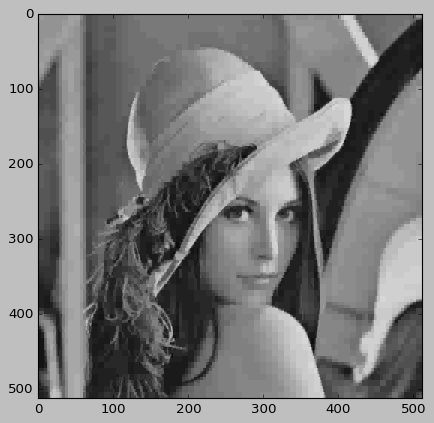

In [19]:
# quantize the coefficients, step = 50
cA_new = coefficientQuantizer(cA,50)
cH1_new = coefficientQuantizer(cH1,50)
cV1_new = coefficientQuantizer(cV1,50)
cD1_new = coefficientQuantizer(cD1,50)
cH2_new = coefficientQuantizer(cH2,50)
cV2_new = coefficientQuantizer(cV2,50)
cD2_new = coefficientQuantizer(cD2,50)
cH3_new = coefficientQuantizer(cH3,50)
cV3_new = coefficientQuantizer(cV3,50)
cD3_new = coefficientQuantizer(cD3,50)

# making coefficients list 
c50 = [cA_new,(cH3_new, cV3_new, cD3_new) ,(cH2_new, cV2_new, cD2_new),(cH1_new, cV1_new, cD1_new)]

# inverse wavelet transform
lena_i = pywt.waverec2(c50, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

plt.imshow(lena_i,cmap='gray')

print(f'MSE: {mean_square_error(lena,lena_i)}')
print(f'PSNR: {PSNR(lena,lena_i)}')

MSE: 619.742523
PSNR: 20.208690648882424


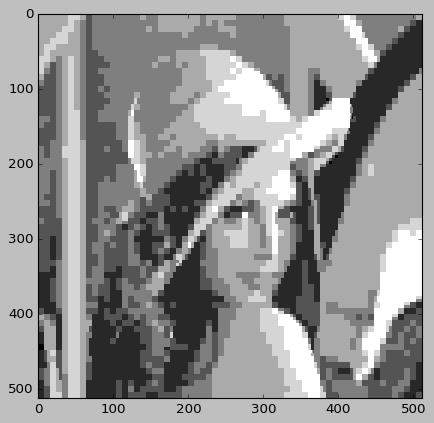

In [20]:
# quantize the coefficients, step = 255
cA_new = coefficientQuantizer(cA,255)
cH1_new = coefficientQuantizer(cH1,255)
cV1_new = coefficientQuantizer(cV1,255)
cD1_new = coefficientQuantizer(cD1,255)
cH2_new = coefficientQuantizer(cH2,255)
cV2_new = coefficientQuantizer(cV2,255)
cD2_new = coefficientQuantizer(cD2,255)
cH3_new = coefficientQuantizer(cH3,255)
cV3_new = coefficientQuantizer(cV3,255)
cD3_new = coefficientQuantizer(cD3,255)

# making coefficients list 
c255 = [cA_new,(cH3_new, cV3_new, cD3_new) ,(cH2_new, cV2_new, cD2_new),(cH1_new, cV1_new, cD1_new)]

# inverse wavelet transform
lena_i = pywt.waverec2(c255, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

plt.imshow(lena_i,cmap='gray')

print(f'MSE: {mean_square_error(lena,lena_i)}')
print(f'PSNR: {PSNR(lena,lena_i)}')